In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
#Decision Tree 

In [2]:
df = pd.read_csv("data3.csv")
inputs = df.drop('salary',axis='columns')
target = df.salary

In [3]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [4]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_company.fit_transform(inputs['job'])
inputs['degree_n'] = le_company.fit_transform(inputs['degree'])
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [5]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

In [6]:
model.fit(inputs_n,target)

DecisionTreeClassifier(random_state=42)

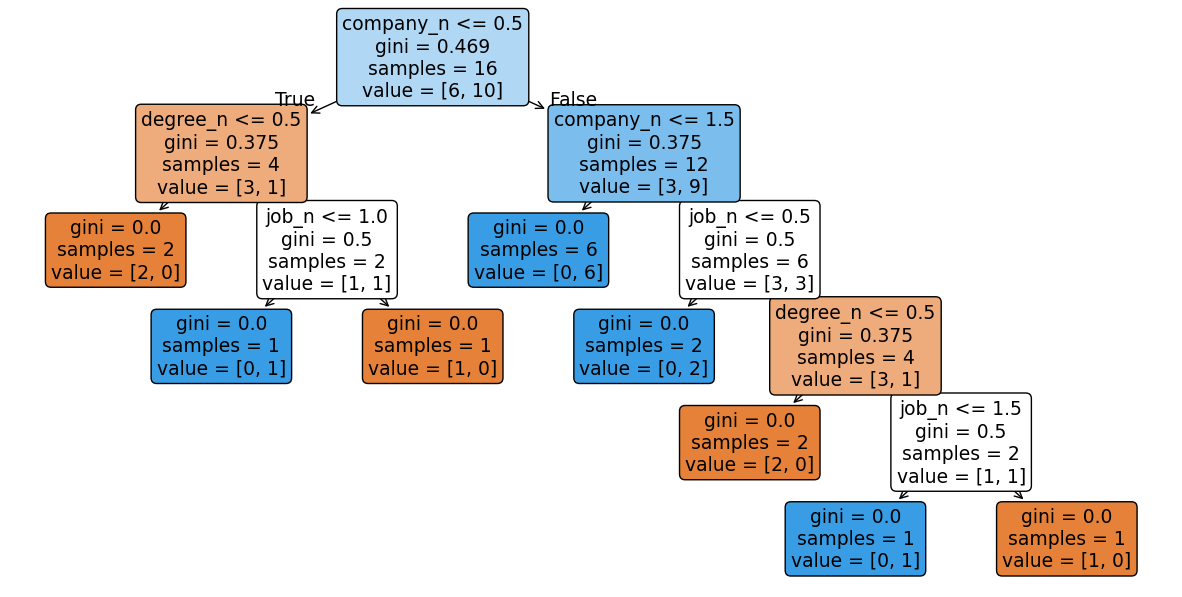

In [7]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7.5))
plot_tree(model,
         filled=True,
         rounded=True,
         feature_names=inputs_n.columns);

In [8]:
model.score(inputs_n,target)

1.0

In [9]:
model.predict([[2,0,1]])

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [12]:
from sklearn.model_selection import cross_val_score
model2 = DecisionTreeClassifier(random_state=0,ccp_alpha=0.05)
score = cross_val_score(model2,inputs_n,target,cv=5)
score

array([0.5       , 0.33333333, 0.33333333, 1.        , 0.66666667])

In [13]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    score = cross_val_score(model2,inputs_n,target,cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])

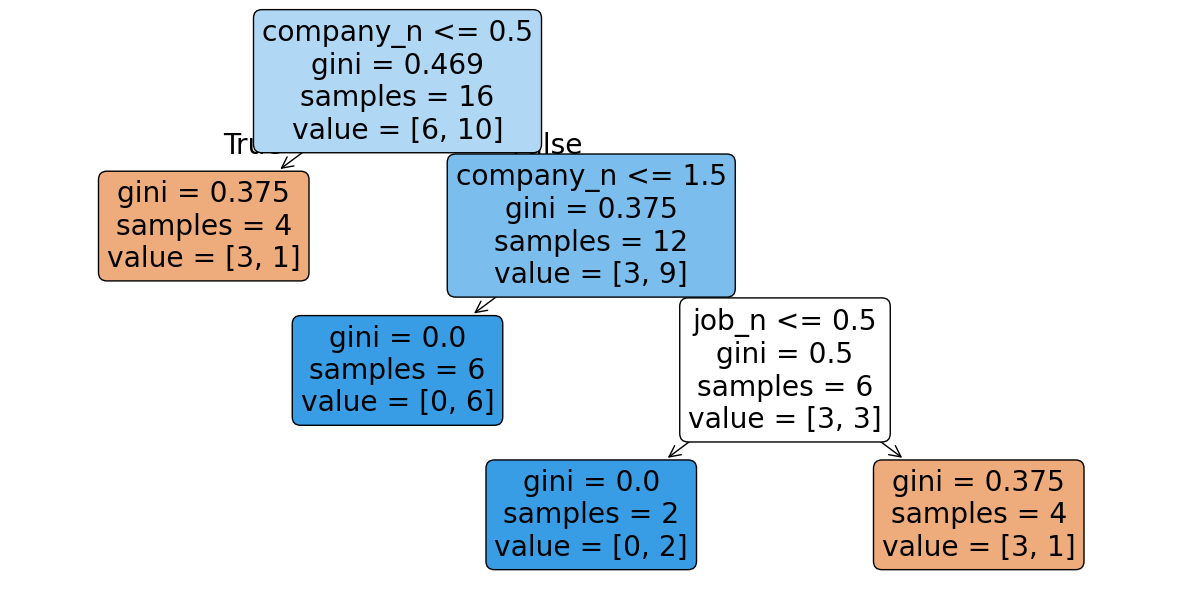

In [14]:
model_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=0.05)
model_pruned = model_pruned.fit(inputs_n,target)
plt.figure(figsize=(15,7.5))
plot_tree(model_pruned,filled=True,rounded=True,feature_names=inputs_n.columns);

In [ ]:
#Support Vector Machine

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [16]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target

In [17]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [18]:
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

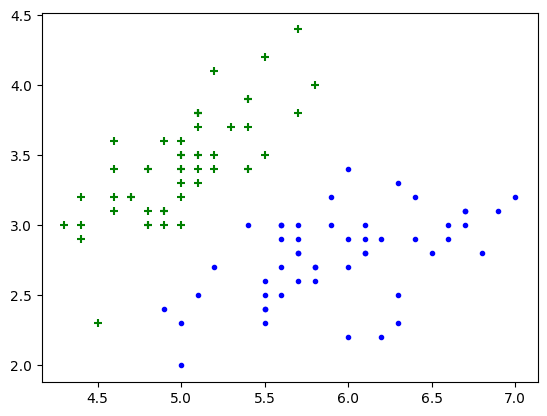

In [20]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='.')

In [21]:
from sklearn.model_selection import train_test_split
x = df.drop(['target','flower_name'],axis='columns')
y = df.target

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [23]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [24]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [25]:
model.score(x_test,y_test)

0.9333333333333333

In [26]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [27]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
df = pd.DataFrame(digits.data)
df['target'] = digits.target

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(['target'],axis='columns'),digits.target,test_size=0.2)

In [ ]:
#RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30)

In [31]:
model.score(x_test,y_test)

0.9583333333333334

In [32]:
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm 

array([[34,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 44,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1, 32,  1,  0,  0,  0],
       [ 1,  1,  0,  0,  1,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 31,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  1,  1, 30]])